In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


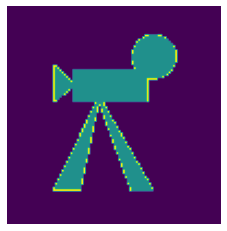

C:\Users\jatin\anaconda3\envs\cv\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


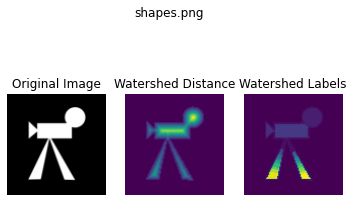

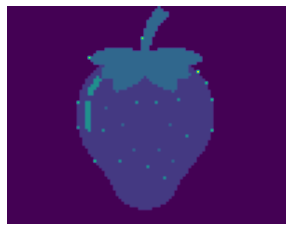

C:\Users\jatin\anaconda3\envs\cv\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


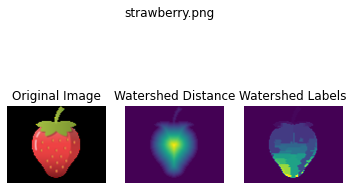

C:\Users\jatin\anaconda3\envs\cv\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


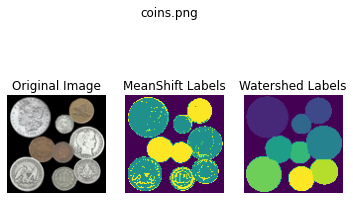

C:\Users\jatin\anaconda3\envs\cv\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


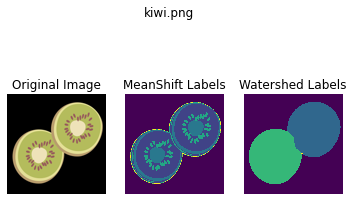

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    name, ext = figure_title.split('.')

    plt.savefig(f'{name}_three.jpg', bbox_inches='tight', pad_inches=0)
    plt.show()


for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    b, g, r = img_mat[:, :, 0], img_mat[:, :, 1], img_mat[:, :, 2]

    # Step 2 - Combine the three colour channels by flatten each channel
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    b_flat = b.flatten()
    g_flat = g.flatten()
    r_flat = r.flatten()
    colour_samples = np.column_stack((b_flat, g_flat, r_flat))


    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape
    # for displaying the segmentation output
    ms_labels = ms_labels.reshape(b.shape)
    plt.imshow(ms_labels)
    name, ext = img_path.split('.')
    plt.axis('off')
    plt.savefig(f'{name}_meanshift_segmented.png', bbox_inches='tight', pad_inches=0)
    plt.show()

    #%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    grey = img.convert('L')
    img_array = np.array(grey)
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)

    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                                labels=img_array)
    markers = ndi.label(local_maxi)[0]

    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img_array)

    # Display the results
    # plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
    #                   ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    plot_three_images(img_path, img_mat, "Original Image", distance, "Watershed Distance",
                      ws_labels, "Watershed Labels")

#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)

    img_mat = np.array(img)[:, :, :3]
    b, g, r = img_mat[:, :, 0], img_mat[:, :, 1], img_mat[:, :, 2]
    b_flat = b.flatten()
    g_flat = g.flatten()
    r_flat = r.flatten()
    colour_samples = np.column_stack((b_flat, g_flat, r_flat))

    # TODO: perform meanshift on image
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    ms_labels = ms_labels.reshape(b.shape)

    grey = img.convert('L')
    img_array = np.array(grey)
    distance = ndi.distance_transform_edt(img_array)
    if img_path == 'kiwi.png':
        local_maxi = peak_local_max(distance, min_distance=40, indices=False,
                                labels=img_array)
    else:
        local_maxi = peak_local_max(distance, threshold_abs=9, indices=False, footprint=np.ones((1, 1)),
                                    labels=img_array)

    markers = ndi.label(local_maxi)[0]

    # TODO: perform an optimisation and then watershed on image
    ws_labels = watershed(-distance, markers, mask=img_array)

    # Display the results
    plot_three_images(img_path, img_mat, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
